In [1]:
!pip install scipy
!pip install opencv-python

In [2]:
from __future__ import print_function, division   # Python 2/3 compatibility
from skimage import io, img_as_ubyte              # utilities to read and write images in various formats
import numpy as np                                # array manipulation package
import matplotlib.pylab as plt                    # plotting package
%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 16)         # set default figure size
plt.rcParams['image.cmap'] = 'gray'               # set default colormap to gray

# Assignment 2 : Intensity Transformations and Spatial Filtering

The following programming assignment involves two tasks, viz.: basic histogram processing and spatial domain image filtering tasks, i.e., image sharpening.

**Please, follow carefully the submission instructions given in the end of this notebook.** You are encouraged to seek information in other places than the course book and lecture material but remember **list all your sources under references**.

If you experience problems that you cannot solve using the course material or the Python documentation, or have any questions regarding the programming assignments, please do not hesitate to contact the course assistant by sending an e-mail at dip@unioulu.oulu.fi. You can also join in for the Q & A session (schedule is given on the course page in Moodle) for this assignment.

**At first, fill in your personal details below.**

# Personal details:

* **Name(s) and student ID(s):** 
Student: Name - Nirzor Talukder; 
Student Id - 2207845

* **Contact information:** 
email Address - 1: nirzor.talukder@student.oulu.fi

# 1. Histogram operations

In the following, you will have to analyze two images, `coffee.jpg` and `pout.tif`, and their histograms, and to compare the results of two histogram operations, namely histogram equalization and stretching. Now, perform the following operations in the reserved code cells and answer to the questions written in **bold** into the reserved spaces in **Finnish or English**.

**1.1. Read and display the images `coffee.jpg` and `pout.tif` and their histograms in the same figure.**

Hint: You can plot the histogram of an image with matplotlib's __[`hist()`](https://matplotlib.org/devdocs/api/_as_gen/matplotlib.pyplot.hist.html)__ function but please note that you have to ravel the pixels of the 2D image into 1D array first.

Text(0.5, 1.0, 'Histogram of Pout.tif')

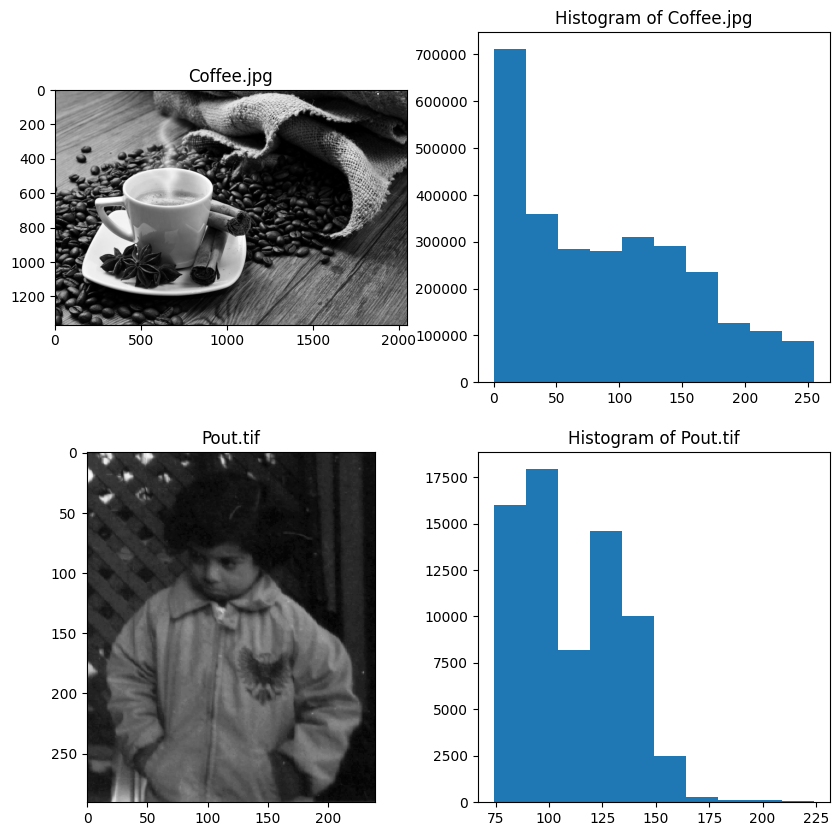

In [3]:
# read the two images
coffee = (io.imread('coffee.jpg', as_gray=True) )  
coffee = img_as_ubyte(coffee)
pout = io.imread('pout.tif')

# converting 2D arrays into 1D array for faster calculation
coffee_raveled = coffee.ravel()
pout_raveled = pout.ravel()

# display the two images and their histograms in the same figure
fig, ((ax0, ax1), (ax2, ax3)) = plt.subplots(figsize=(10,10), nrows=2, ncols=2) 

ax0.imshow(coffee, cmap='gray')
ax0.set_title('Coffee.jpg')
 
ax1.hist(coffee_raveled)
ax1.set_title("Histogram of Coffee.jpg")

ax2.imshow(pout, cmap='gray')
ax2.set_title('Pout.tif')

ax3.hist(pout_raveled)
ax3.set_title("Histogram of Pout.tif")

**Compare the two images and their histograms. What can you say about the contrast of the images?**

`For the image coffee.jpg,
  the histogram shows more darker pixels compared to the brighter pixels. Also there are some high intensity pixels. These makes the existence of contrast in the image and translates to easier understanding of details in the image.
  
For the image pout.tif, 
  there are close to non-existent high intensity pixels. This makes the image a poor quality one since the details are not clearly visible. Even amongst the darker intensity pixels, the distribution is more or less even. This makes image of bad quality for understanding through human eyes.
`

### Histogram equalization

**1.2. Perform histogram equalization with the function __[`exposure.equalize_hist()`](http://scikit-image.org/docs/dev/api/skimage.exposure.html#skimage.exposure.equalize_hist)__ and display the resulting images and their histograms in the same figure.**

Hint: Please note that `exposure.equalize_hist()` function returns `float64` image. You need to __[convert the image back to `uint8`](http://scikit-image.org/docs/dev/user_guide/data_types.html)__ after histogram equalization so that the intensity value range of the resulting and original histograms are comparable.

Text(0.5, 1.0, 'Equalized Histogram of Pout.tif')

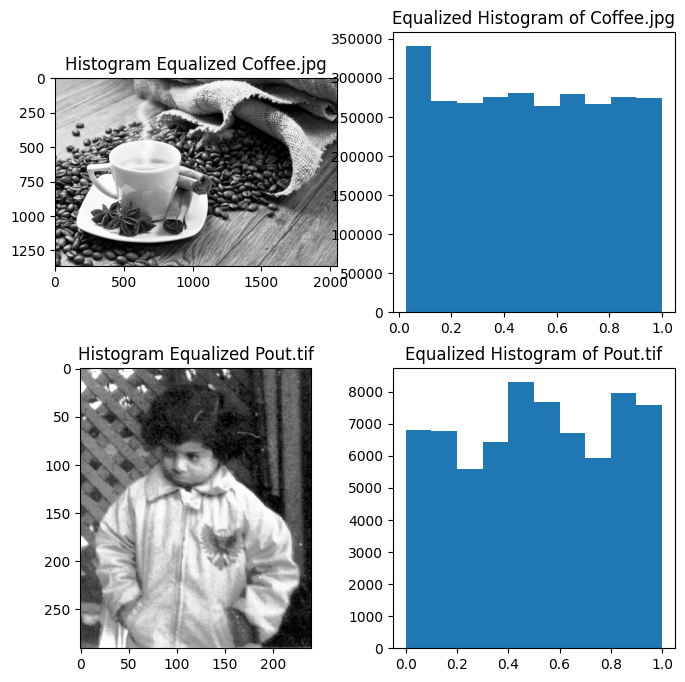

In [4]:
from skimage import exposure
from skimage import img_as_ubyte

# perform histogram equalization and convert data type from 'float64' back to 'uint8' after histogram equalization
histogram_equalized_coffee = exposure.equalize_hist(coffee)
histogram_equalized_pout = exposure.equalize_hist(pout)

new_coffee = (histogram_equalized_coffee*255).astype('uint8')
new_pout = (histogram_equalized_pout*255).astype('uint8')

# display resulting images and their histograms in the same figure
fig, ((ax0, ax1), (ax2, ax3)) = plt.subplots(figsize=(8,8), nrows=2, ncols=2) 

ax0.imshow(new_coffee, cmap='gray')
ax0.set_title('Histogram Equalized Coffee.jpg')
 
ax1.hist(histogram_equalized_coffee.ravel())
ax1.set_title("Equalized Histogram of Coffee.jpg")

ax2.imshow(new_pout, cmap='gray')
ax2.set_title('Histogram Equalized Pout.tif')

ax3.hist(histogram_equalized_pout.ravel())
ax3.set_title("Equalized Histogram of Pout.tif")

**Again, compare the two images. Did histogram equalization help in increasing image contrast? Why or why not?**

`Since both the images had their intensity distribution skewed towards the darker intensity, the histogram equalization didn't perform well according to me. Had there been comparable number of pixels with both high intensity and low intensity, the histogram equalization could perform better enhancing the level distinguishable contrast in the image. Instead the brightness in both the cases are increased and this might cause some details to be lost in the highlights. `

### Contrast stretching

Another way of improving the contrast in an image is to simply stretch the original pixel values over an extended dynamic range using a linear scaling function. For instance, in case of an `uint8` image, the desired value range of a contrast-stretched image could be the full range from 0 to 255. 

Intuitively, one could perform contrast-stretching by selecting the minimum and maximum values of the original image and map these values to 0 and 255, respectively, and linearly scale all other pixel values in between accordingly. However, even a single outlier pixel value (high or low) can affect the input scaling range too much when outcome of the histogram stretching is not particularly good.

A more robust approach is to map the intensity values so that e.g. 1st and 99th percentiles of the histogram are saturated at the minimum and maximum values of the desired intensity range. In other words, 1% of the pixels of both low and high intensities will be mapped to 0 and 255 in the contrast-stretched image while rest are scaled linearly in between.

**1.3. Now, perform contrast stretching on the original images with the help of functions __[`np.percentile()`](https://numpy.org/doc/stable/reference/generated/numpy.percentile.html)__ and __[`exposure.rescale_intensity()`](http://scikit-image.org/docs/dev/api/skimage.exposure.html#skimage.exposure.rescale_intensity)__ so that the full range from 0 and 255 is utilized based on the 1st and 99th percentiles of their histograms. Then, display the resulting images and their histograms in the same figure.**

Text(0.5, 1.0, 'Histogram of Contrast Rescaled Pout.tif')

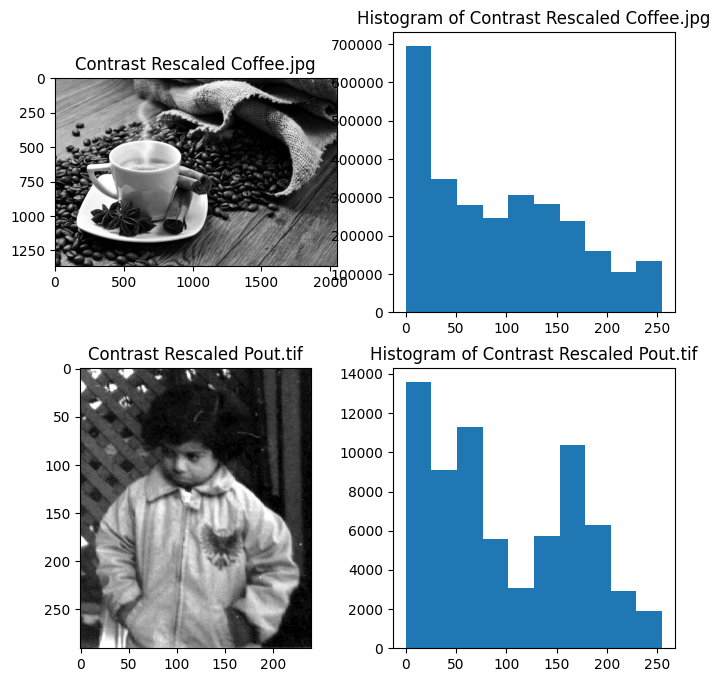

In [5]:
# find the 1st and 99th percentiles of each image
coffee_1st_percentile, coffee_99th_percentile = np.percentile(coffee, (1, 99))
pout_1st_percentile, pout_99th_percentile = np.percentile(pout, (1, 99))

# rescale the intensities of both images to full 'uint8' range [0, 255] based on their 1st and 99th percentiles
coffee_rescaled = exposure.rescale_intensity(coffee, in_range=(coffee_1st_percentile, coffee_99th_percentile))
pout_rescaled = exposure.rescale_intensity(pout, in_range=(pout_1st_percentile, pout_99th_percentile))

# display resulting images and their histograms
fig, ((ax0, ax1), (ax2, ax3)) = plt.subplots(figsize=(8,8), nrows=2, ncols=2) 

ax0.imshow(coffee_rescaled, cmap='gray')
ax0.set_title('Contrast Rescaled Coffee.jpg')
 
ax1.hist(coffee_rescaled.ravel())
ax1.set_title("Histogram of Contrast Rescaled Coffee.jpg")

ax2.imshow(pout_rescaled, cmap='gray')
ax2.set_title('Contrast Rescaled Pout.tif')

ax3.hist(pout_rescaled.ravel())
ax3.set_title("Histogram of Contrast Rescaled Pout.tif")

### Comparison

**1.4. Finally, display the original `coffee.jpg` image, and its histogram-equalized and contrast-stretched versions and the corresponding histograms into one figure (in total six images in one figure). Do the same for `pout.tif` as well.**

Text(0.5, 1.0, 'Histogram of Contrast Rescaled pout.tif')

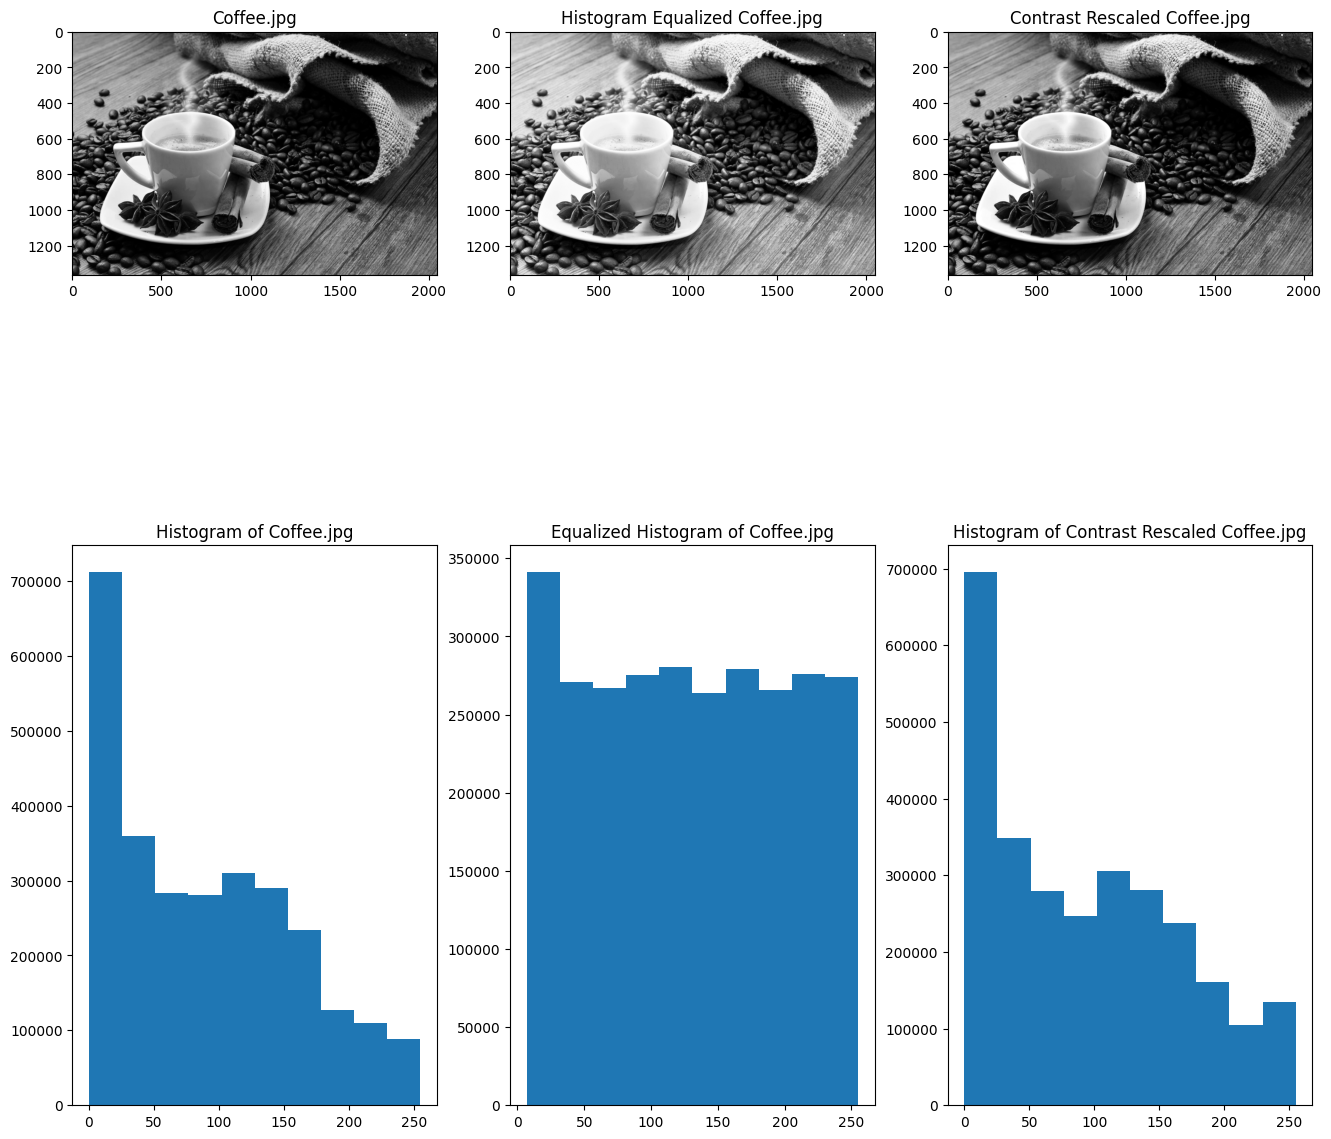

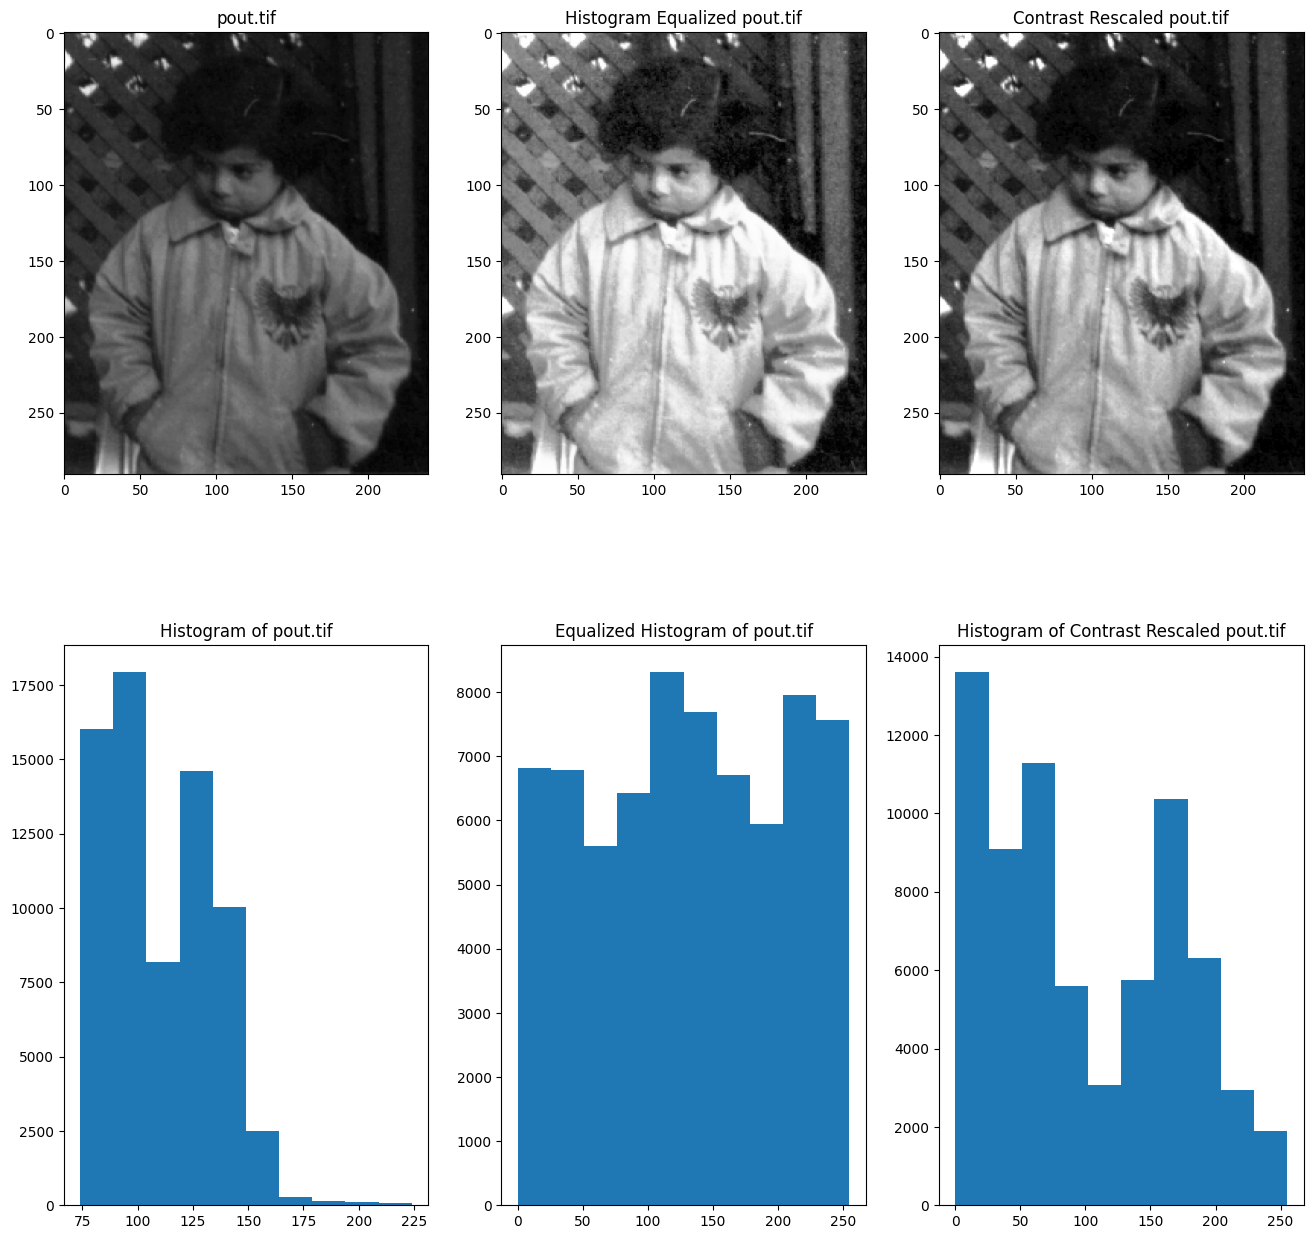

In [6]:
# 6 subplots for 'coffee.jpg'
fig, ((ax0, ax1, ax2), (ax3, ax4, ax5)) = plt.subplots(figsize=(16,16), nrows=2, ncols=3) 

# images
ax0.imshow(coffee, cmap='gray')
ax0.set_title('Coffee.jpg')

ax1.imshow(new_coffee, cmap='gray')
ax1.set_title('Histogram Equalized Coffee.jpg')

ax2.imshow(coffee_rescaled, cmap='gray')
ax2.set_title('Contrast Rescaled Coffee.jpg')

# histograms
ax3.hist(coffee.ravel())
ax3.set_title("Histogram of Coffee.jpg")

ax4.hist((histogram_equalized_coffee*255).ravel())
ax4.set_title("Equalized Histogram of Coffee.jpg")

ax5.hist(coffee_rescaled.ravel())
ax5.set_title("Histogram of Contrast Rescaled Coffee.jpg")


# 6 subplots for 'pout.tif'
fig, ((ax0, ax1, ax2), (ax3, ax4, ax5)) = plt.subplots(figsize=(16,16), nrows=2, ncols=3) 

# images
ax0.imshow(pout, cmap='gray')
ax0.set_title('pout.tif')

ax1.imshow(new_pout, cmap='gray')
ax1.set_title('Histogram Equalized pout.tif')

ax2.imshow(pout_rescaled, cmap='gray')
ax2.set_title('Contrast Rescaled pout.tif')

# histograms
ax3.hist(pout.ravel())
ax3.set_title("Histogram of pout.tif")

ax4.hist((histogram_equalized_pout*255).ravel())
ax4.set_title("Equalized Histogram of pout.tif")

ax5.hist(pout_rescaled.ravel())
ax5.set_title("Histogram of Contrast Rescaled pout.tif")

**Which method gives better result for each of the two images in** ***your*** **opinion? Why??**

`In both the cases the Contrast Rescaled images were better. I think this is because of the type of the distribution of intensities in the images. If we consider the pixel intensity distribution in both of the images, it can be seen that the images have higher darker intensity pixels compared to the lower intensity pixels. Contrast rescaling thus slightly increases the number of high intensity pixels, which results in an image with sharper details. 

For the image 'coffee.jpg', 
  the histogram after the equalization has all the pixel intensities in the same number roughly, resulting in a brighter image for increased high intensity pixels which were not present in the original image previously.
  The histogram after contrast rescaling has slightly higher some high intensity pixels, resulting in an image with more sharp contrasts along edges according to me. But, it's still better than the histogram equalized image.

For the image 'pout.tif', 
  the histogram after the equalization both the high intensity and low intensities equalized in the image, resulting in an image that is brighter for this one too. 
  The histogram after contrast rescaling has higher high intensity pixels in number and the resulting image's child is more distinguishable from the background and it's better comparatively.
    `

# 2. Image sharpening

First, read the part concerning sharpening spatial transforms in the lecture notes or in the course book.

In this exercise, your task is to perform a sharpening transform to the image `moonunsharp.tif` in spatial domain enhancing the details, like edges, in the original grayscale image. The use of built-in functions that perform image sharpening from scratch, like `scipy.misc.imfilter()`, is forbidden but functions like __[`scipy.signal.convolve2d()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.convolve2d.html)__ can be used for the task. You can select some method presented in the lecture notes or the course book, e.g. use Laplacian operator and convolution, for sharpening the test image. 

Please note that it does not matter what method you use or how “good” the sharpening looks as long as the sharpening can be observed in the end result. An example result achieved with __[`ImageFilter`](https://pillow.readthedocs.io/en/stable/reference/ImageFilter.html)__ is shown below:

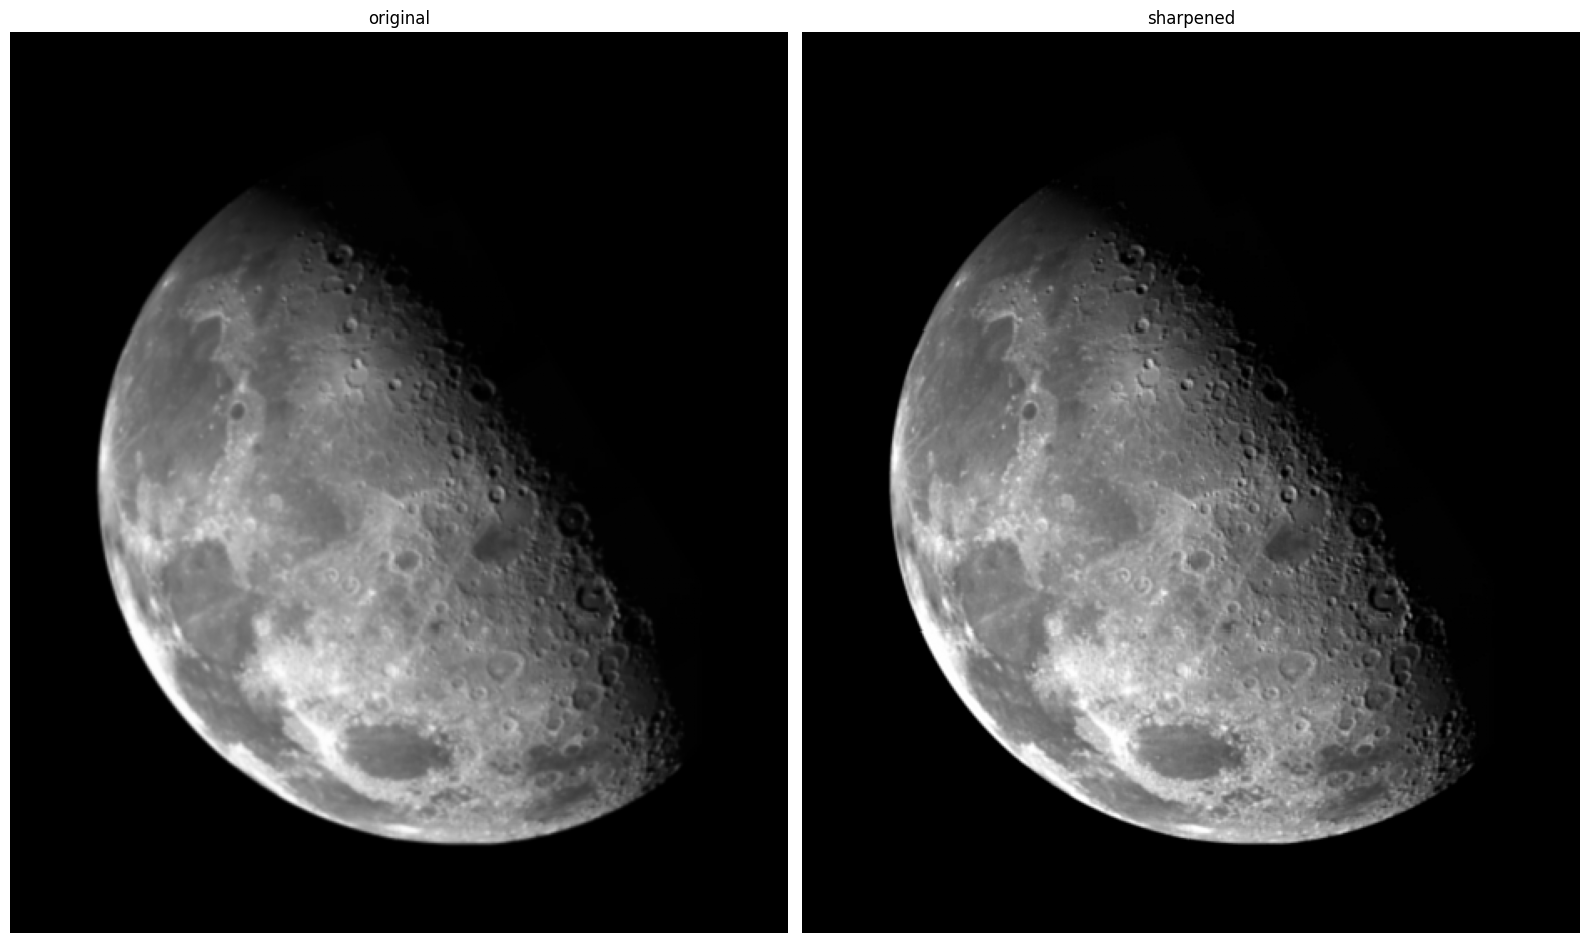

In [7]:
# image sharpening example using 'ImageFilter' module from PILLOW with 'image.filter()' function
from PIL import ImageFilter, Image

moon = Image.open('moonunsharp.tif')
moon_sharp_example = moon.filter(ImageFilter.SHARPEN)

fig, ax = plt.subplots(1, 2)
ax[0].imshow(moon, vmin=0, vmax=255, cmap=plt.get_cmap('gray'))
ax[0].set_title('original')
ax[0].axis('off')
ax[1].imshow(moon_sharp_example, vmin=0, vmax=255, cmap=plt.get_cmap('gray'))
ax[1].set_title('sharpened')
ax[1].axis('off')
fig.tight_layout()

**2.1. Now, implement your own image sharpening transform and apply it on the test image.**

Hint: Like in the previous task, please note the __[image data type (`dtype`) and corresponding value range](http://scikit-image.org/docs/dev/user_guide/data_types.html)__ after filtering/sharpening as unexpected errors with arithmetic may occur (see pre-tutorials) !

In [8]:
from scipy.signal import convolve2d

# Perform image sharpening using e.g. a Laplacian mask and convolution
# speficying the mask
laplacian_mask = np.array([[0, 1, 0], [1, -4, 1], [0, 1, 0]])

# result of masking  and keeping the image size same as the original image
masked_image = convolve2d(moon, laplacian_mask, mode='same')

# normalization of the masked image since the range of the values have negative
# values and are not in the range from 0 to 255
#normalized_image = np.clip(masked_image, 0, 255).astype(np.uint8)
#print(np.unique(normalized_image).size)
#
import cv2
normalized_image = cv2.normalize(masked_image, None, alpha=0, beta=255, 
                                 norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U)

# calculation for sharpened image after normalization and masking
sharpened_image = np.asarray(moon) * 1.5 + normalized_image * (-.5)

**2.2. Display the original and sharpened moon images in the same figure.**

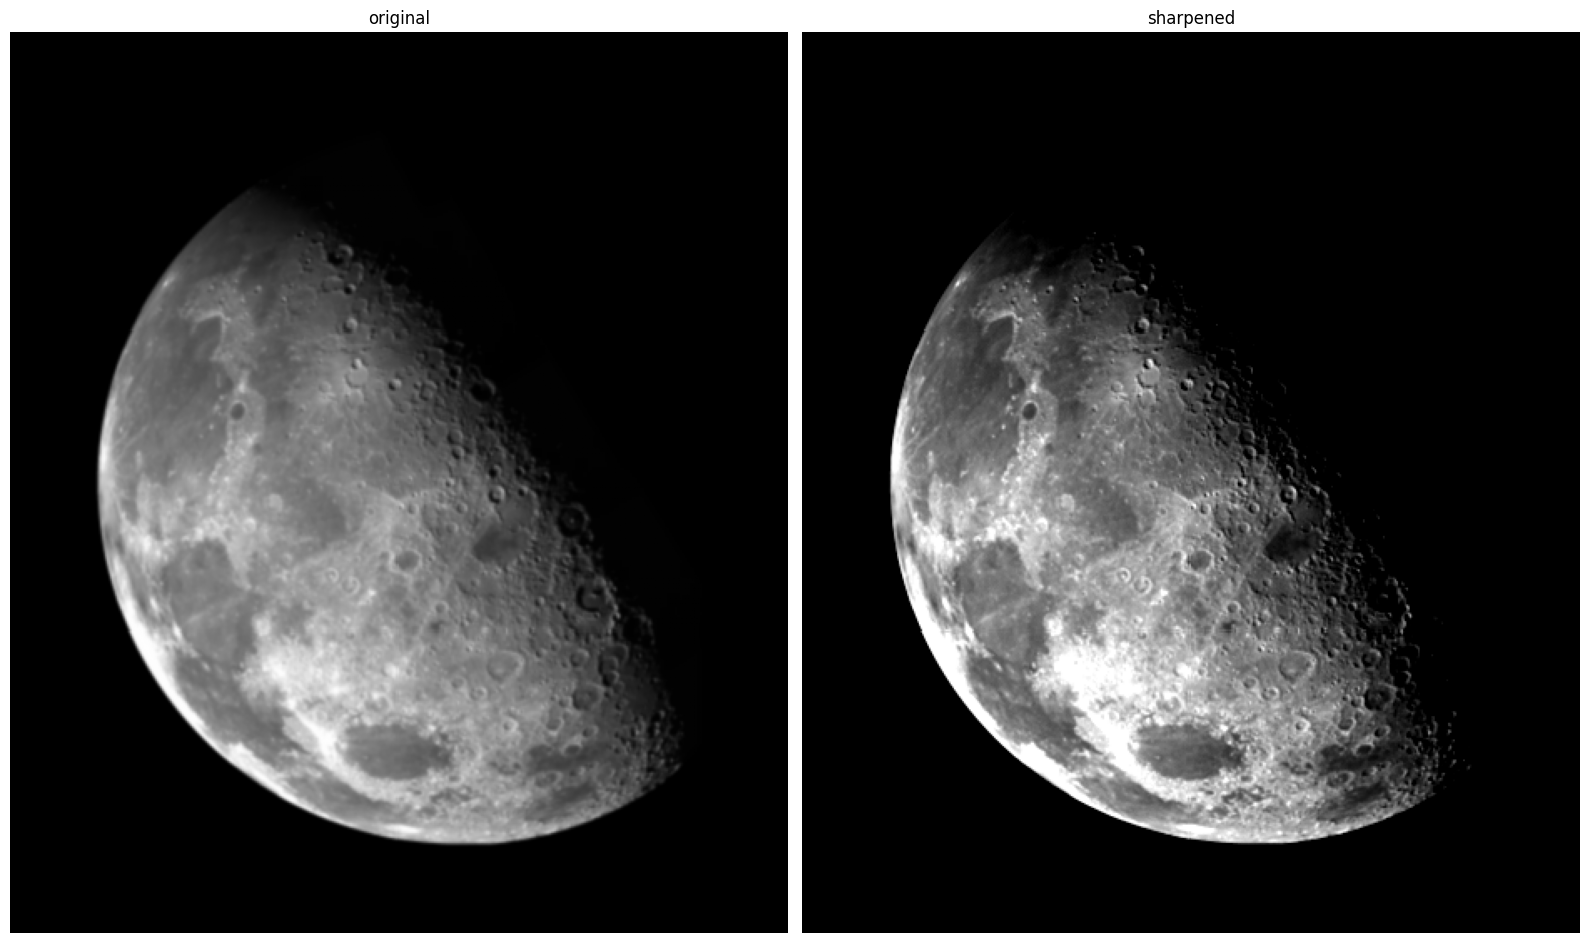

In [9]:
fig, ax = plt.subplots(1, 2)
ax[0].imshow(moon, vmin=0, vmax=255, cmap=plt.get_cmap('gray'))
ax[0].set_title('original')
ax[0].axis('off')
ax[1].imshow(sharpened_image, vmin=0, vmax=255, cmap=plt.get_cmap('gray'))
ax[1].set_title('sharpened')
ax[1].axis('off')
fig.tight_layout()

# Aftermath
Finally, fill your answers to the following questions:

**How much time did you need to complete this exercise?**

`Roughly five hours.`

**Did you experience any problems with the exercise? Was there enough help available? Should this notebook be more (or less) detailed?**

`Not that mentionable difficulties I faced going through the assignment. However, I struggled a bit with datatypes and ranges of intensities after different transformations and also made some mistakes. But I learned about them after the tutor pointed out those mistakes. Overall, the learning experience was smooth. And good that I made those mistakes.

Yes, the help is easily accessible. I sought help twice during the week and there was immediate assitance from the responsible. 

I think the notebook is in perfect shape.`

# References
`
* [1] https://matplotlib.org/stable/gallery/statistics/histogram_multihist.html

* [2] https://www.tutorialspoint.com/how-to-normalize-an-image-in-opencv-python`

# Submission

1. Before submitting your work, **check that your notebook (code) runs from scratch** and reproduces all the requested results by clicking on the menu `Kernel -> Restart & Run All`! Also, check that you have answered all the questions written in **bold**.
2. Clear all outputs and variables, etc. by click on the menu `Kernel -> Restart & Clear Output`. This may (or will) reduce the file size of your deliverable a lot! 
3. Rename this Jupyter notebook to **`DIP_PA2_[student number(s)].ipynb`** (e.g. `DIP_PA2_1234567.ipynb` if solo work or `DIP_PA2_1234567-7654321.ipynb` if working in a pair)